In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
pdm = pd.read_csv("C:/Users/ctata/Documents/Lab/quality_vectors/data/AG_new/feces/dists/asv/tree_pdm_filter.07.csv", index_col = 0)

In [ ]:
pdm.shape

In [4]:
qdm = pd.read_csv("C:/Users/ctata/Documents/Lab/quality_vectors/data/AG_new/feces/dists/asv/qual_vec_dists_filter.07_250_2.csv", index_col = 0)

In [5]:
for i in range(pdm.shape[0]):
    qdm.iloc[i,i] = None
    pdm.iloc[i,i] = None

In [6]:
pdm_row = pdm.sort_index(axis = 0)
pdm_both = pdm_row.sort_index(axis = 1)

In [7]:
qdm_row = qdm.sort_index(axis = 0)
qdm_both = qdm_row.sort_index(axis = 1)

In [7]:
np.max(np.max(qdm_both))

2.22115763014927

In [8]:
ranges = range(26)
bin_size = 100
z = np.zeros((bin_size+1, bin_size+1))
for r in ranges:
    i = 1000
    print(r)
    qdm_small = qdm_both.iloc[r*i : (r+1)*i, :]
    pdm_small = pdm_both.iloc[r*i : (r+1)*i, :]
    
    x_small = np.max(np.max(qdm_small))
    y_small = np.max(np.max(pdm_small))

    bins_x = np.linspace(0, x_small, bin_size)
    bins_y = np.linspace(0, y_small, bin_size)
    x = np.digitize(qdm_small, bins_x)
    y = np.digitize(pdm_small, bins_y)

    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[y[i,j], x[i,j]] += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [9]:
import matplotlib as mpl
def plotLegend(scale, ax, cmap):
    norm = mpl.colors.Normalize(vmin=min(scale), vmax=max(scale))
    cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                    norm = norm,
                                    orientation='vertical')

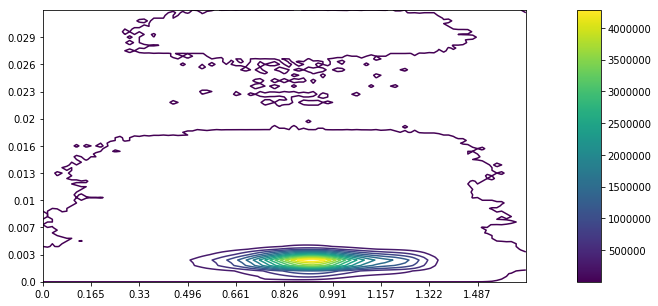

In [10]:
max_val = np.max(z)
scale = np.arange(1, max_val, max_val / 15)
cmap = 'viridis'
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5), gridspec_kw = {'width_ratios':[20, 1]})
ax1.contour(z, levels = scale, cmap =  cmap)
x_range = range(len(bins_x))
y_range = range(len(bins_y))
ax1.set_xticks(x_range[0::10])
ax1.set_yticks(y_range[0::10])
ax1.set_yticklabels([round(i, 3) for i in bins_y[0::10]])
ax1.set_xticklabels([round(i, 3) for i in bins_x[0::10]])
plotLegend(scale, ax2, cmap)

In [11]:
pdm

,seq23158,seq7928,seq22034,seq11699,seq7190,seq14279,seq15602,seq21926,seq4700,seq4987,...,seq5880,seq206,seq17468,seq3113,seq11972,seq19522,seq13366,seq24730,seq11632,seq21232
seq23158,NaN,0.000234,0.007395,0.000908,0.001729,0.002326,0.001722,0.002960,0.002324,0.000421,...,0.000903,0.000691,0.002141,0.002196,0.007906,0.000727,0.000337,0.003496,0.002516,0.002964
seq7928,0.000234,NaN,0.007316,0.000830,0.001650,0.002247,0.001643,0.002881,0.002246,0.000342,...,0.000824,0.000612,0.002062,0.002117,0.007827,0.000648,0.000258,0.003417,0.002437,0.002885
seq22034,0.007395,0.007316,NaN,0.007607,0.007624,0.008221,0.007617,0.008855,0.008220,0.007256,...,0.007602,0.007390,0.008036,0.008091,0.009935,0.007379,0.007171,0.009391,0.008411,0.008859
seq11699,0.000908,0.000830,0.007607,NaN,0.001941,0.002538,0.001935,0.003173,0.002537,0.000769,...,0.000042,0.000794,0.002353,0.002408,0.008118,0.000939,0.000684,0.003708,0.002729,0.003176
seq7190,0.001729,0.001650,0.007624,0.001941,NaN,0.002308,0.001821,0.002943,0.002423,0.001589,...,0.001935,0.001724,0.002240,0.002295,0.008135,0.001713,0.001504,0.003478,0.002615,0.002947
seq14279,0.002326,0.002247,0.008221,0.002538,0.002308,NaN,0.002418,0.001581,0.003020,0.002186,...,0.002532,0.002321,0.002837,0.002892,0.008732,0.002310,0.002101,0.004010,0.003212,0.001584
seq15602,0.001722,0.001643,0.007617,0.001935,0.001821,0.002418,NaN,0.003053,0.002320,0.001583,...,0.001929,0.001717,0.001697,0.001752,0.008128,0.001706,0.001498,0.003588,0.002073,0.003056
seq21926,0.002960,0.002881,0.008855,0.003173,0.002943,0.001581,0.003053,NaN,0.003655,0.002821,...,0.003167,0.002955,0.003471,0.003526,0.009366,0.002944,0.002736,0.004645,0.003847,0.000420
seq4700,0.002324,0.002246,0.008220,0.002537,0.002423,0.003020,0.002320,0.003655,NaN,0.002185,...,0.002531,0.002320,0.002739,0.002794,0.008730,0.002308,0.002100,0.004190,0.003114,0.003659
seq4987,0.000421,0.000342,0.007256,0.000769,0.001589,0.002186,0.001583,0.002821,0.002185,NaN,...,0.000763,0.000552,0.002002,0.002057,0.007766,0.000587,0.000121,0.003356,0.002377,0.002825
